`About Dataset`
Overview of the dataset:
The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.

To provide insights into the key factors that contribute to higher insurance costs and help the company make more informed decisions regarding pricing and risk assessment.

The dataset contains 2.7K rows and 7 columns
Columns include

Age
Sex
BMI (Body Mass Index)
Children
Smoker
Region
Charges
Problem Statement:

What are the most important factors that affect medical expenses?
How well can machine learning models predict medical expenses?
How can machine learning models be used to improve the efficiency and profitability of health insurance companies?
Kindly, upvote if you find the dataset interesting. Thank you.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [156]:
me=pd.read_csv("/content/insurance.csv")

In [157]:
me.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [158]:
me.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [159]:
me.shape

(1338, 7)

In [160]:
me.duplicated().sum()

1

In [161]:
me.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [162]:
me.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [163]:
me.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<ipython-input-164-9006e853f457>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(me['age'])


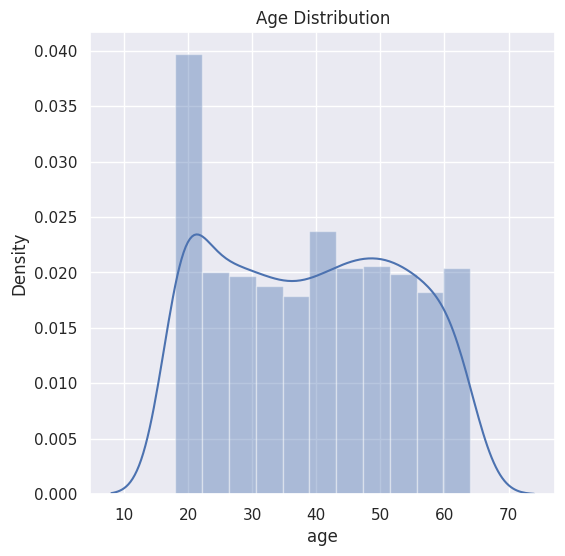

In [164]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(me['age'])
plt.title("Age Distribution")
plt.show()

In [165]:
me["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

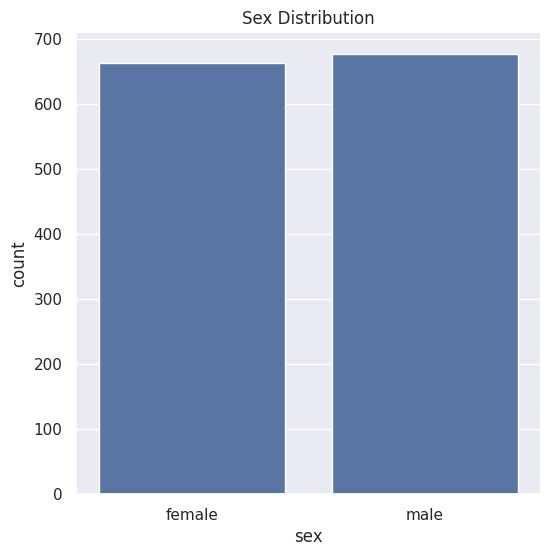

In [166]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=me)
plt.title("Sex Distribution")
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

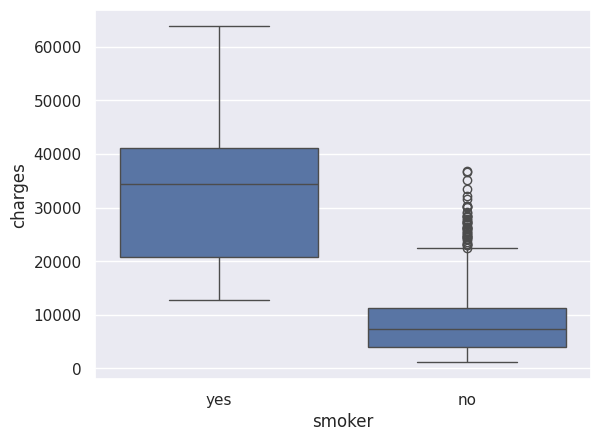

In [167]:
sns.boxplot(data=me,x='smoker',y='charges')

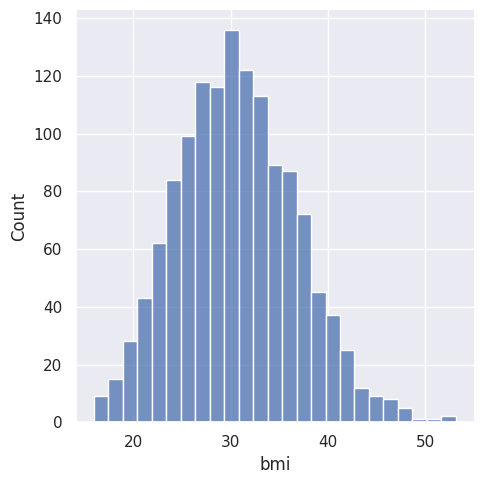

In [168]:
sns.displot(x="bmi", data=me)
plt.show()

In [169]:
me["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [170]:
me["sex"].unique()

array(['female', 'male'], dtype=object)

In [171]:
me["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [172]:
me.replace({"sex":{"male":0,"female":1}},inplace=True)
me.replace({"smoker":{"yes":0,"no":1}},inplace=True)
me.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

#model(LinearRegression)

In [173]:
x=me.drop(columns="charges",axis=1)
y=me["charges"]

In [174]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [175]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [176]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [177]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [178]:
li=LinearRegression()
li.fit(X_train,y_train)

LinearRegression()

In [179]:
training_data_predictuion=li.predict(X_train)
test_data_predictuion=li.predict(X_test)

In [180]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report,mean_absolute_error, mean_squared_error, r2_score

In [181]:
#linear training_data_predictuion
print('Mean Absolute Error:', mean_absolute_error(y_train, training_data_predictuion))
print('Mean Squared Error:', mean_squared_error(y_train, training_data_predictuion))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, training_data_predictuion)))
print('R^2 Score:', r2_score(y_train, training_data_predictuion))

Mean Absolute Error: 4214.89744476707
Mean Squared Error: 37337214.4107756
Root Mean Squared Error: 6110.418513553356
R^2 Score: 0.7413131194887537


In [182]:
#linear test_data_predictuion
print('Mean Absolute Error:', mean_absolute_error(y_test, test_data_predictuion))
print('Mean Squared Error:', mean_squared_error(y_test, test_data_predictuion))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_data_predictuion)))
print('R^2 Score:', r2_score(y_test, test_data_predictuion))

Mean Absolute Error: 4190.220190137914
Mean Squared Error: 33685623.354144424
Root Mean Squared Error: 5803.931715151758
R^2 Score: 0.783021587162344
